# Condition Monitoring of Industrial Equipment

The dataset used contains the machine data of a degrading component recorded over the duration of 12 month total. It was initiated in the European research and innovation project IMPROVE.


The Vega shrink-wrapper from OCME is deployed in large production lines in the food and beverage industry. The machine groups loose bottles or cans into set package sizes, wraps them in plastic film and then heat-shrinks the plastic film to combine them into a package. The plastic film is fed into the machine from large spools and is then cut to the length needed to wrap the film around a pack of goods. The cutting assembly is an important component of the machine to meet the high availability target. 

Therefore, the blade needs to be set-up and maintained properly. Furthermore, the blade can not be inspected visually during operation due to the blade being enclosed in a metal housing and its 
fast rotation speed. Monitoring the cutting blades degradation will increase the machines reliability and reduce unexpected downtime caused by failed cuts.

In [5]:
# importing python packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
from numpy.random import seed
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json
from scipy.special import softmax
from io import BytesIO
import requests
import joblib

In [8]:
# importing the joblib files
link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper1?raw=true'
dfile = BytesIO(requests.get(link).content) 
df1 = joblib.load(dfile)

link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper2?raw=true'
dfile = BytesIO(requests.get(link).content) 
df2 = joblib.load(dfile)

link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper3?raw=true'
dfile = BytesIO(requests.get(link).content) 
df3 = joblib.load(dfile)

link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper4?raw=true'
dfile = BytesIO(requests.get(link).content) 
df4 = joblib.load(dfile)

link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper5?raw=true'
dfile = BytesIO(requests.get(link).content) 
df5 = joblib.load(dfile)

link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper6?raw=true'
dfile = BytesIO(requests.get(link).content) 
df6 = joblib.load(dfile)

link = 'https://github.com/Soot3/testing/blob/master/vega_wrapper7?raw=true'
dfile = BytesIO(requests.get(link).content) 
df7 = joblib.load(dfile)

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062912 entries, 0 to 1062911
Data columns (total 14 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   timestamp                                             1062912 non-null  float64
 1   pCut::Motor_Torque                                    1062912 non-null  float64
 2   pCut::CTRL_Position_controller::Lag_error             1062912 non-null  float64
 3   pCut::CTRL_Position_controller::Actual_position       1062912 non-null  int64  
 4   pCut::CTRL_Position_controller::Actual_speed          1062912 non-null  float64
 5   pSvolFilm::CTRL_Position_controller::Actual_position  1062912 non-null  int64  
 6   pSvolFilm::CTRL_Position_controller::Actual_speed     1062912 non-null  float64
 7   pSvolFilm::CTRL_Position_controller::Lag_error        1062912 non-null  float64
 8   pSpintor::VAX_speed             

In [9]:
df.tail(10)

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,month,day,hour,sample_Number,mode
1062902,8.159999,-0.359152,0.025451,194924331,6904.220215,11693835,4623.247070,1.000701,1499.999756,12,28,185909.0,518.0,mode2
1062903,8.163999,-0.331141,0.004879,194924359,7000.350586,11693853,4600.596680,0.952228,1499.999756,12,28,185909.0,518.0,mode2
1062904,8.167999,-0.291707,0.002798,194924387,7038.116211,11693872,4613.179688,0.961886,1499.999756,12,28,185909.0,518.0,mode2
1062905,8.171999,-0.397413,0.036479,194924415,7154.846191,11693891,4643.380859,0.981849,1499.999756,12,28,185909.0,518.0,mode2
1062906,8.175999,-0.441408,0.031001,194924444,7127.380371,11693909,4658.481445,0.987482,1499.999756,12,28,185909.0,518.0,mode2
1062907,8.179999,-0.277697,-0.023948,194924473,7220.077148,11693928,4610.663086,0.958136,1499.999756,12,28,185909.0,518.0,mode2
1062908,8.183999,-0.285098,-0.022138,194924502,7257.842773,11693946,4618.213379,0.971821,1499.999756,12,28,185909.0,518.0,mode2
1062909,8.187999,-0.155192,-0.034412,194924531,7371.139160,11693964,4582.979004,0.981734,1499.999756,12,28,185909.0,518.0,mode2
1062910,8.191999,-0.371426,0.031594,194924560,7360.839844,11693983,4615.696777,0.987367,1499.999756,12,28,185909.0,518.0,mode2
1062911,8.195999,-0.284030,0.010178,194924590,7395.171875,11694001,4575.428711,1.000303,1499.999756,12,28,185909.0,518.0,mode2


In [10]:
df.corr()

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,month,day,hour,sample_Number
timestamp,1.000000,-0.001657,-0.000159,0.000008,0.003794,0.000066,-0.000641,-0.002296,-0.005066,0.001326,0.000877,0.000949,0.001205
pCut::Motor_Torque,-0.001657,1.000000,-0.425208,-0.002839,-0.547342,-0.007391,0.164157,0.262005,-0.031985,0.015245,-0.005439,-0.001517,0.015300
pCut::CTRL_Position_controller::Lag_error,-0.000159,-0.425208,1.000000,-0.000052,-0.012372,-0.000463,-0.002317,0.075272,-0.000222,0.000193,-0.000208,-0.000035,0.000148
pCut::CTRL_Position_controller::Actual_position,0.000008,-0.002839,-0.000052,1.000000,0.018596,0.060474,0.096100,-0.009163,0.143456,-0.338478,-0.193970,0.072859,-0.360286
pCut::CTRL_Position_controller::Actual_speed,0.003794,-0.547342,-0.012372,0.018596,1.000000,0.018951,-0.341093,-0.230130,0.131766,-0.019988,0.014082,-0.007725,-0.016980
pSvolFilm::CTRL_Position_controller::Actual_position,0.000066,-0.007391,-0.000463,0.060474,0.018951,1.000000,0.118950,-0.052829,0.134661,-0.251833,0.204415,0.201904,-0.248245
pSvolFilm::CTRL_Position_controller::Actual_speed,-0.000641,0.164157,-0.002317,0.096100,-0.341093,0.118950,1.000000,0.256198,0.688930,-0.144110,0.076070,-0.028556,-0.129310
pSvolFilm::CTRL_Position_controller::Lag_error,-0.002296,0.262005,0.075272,-0.009163,-0.230130,-0.052829,0.256198,1.000000,0.087611,0.114456,0.052795,-0.045904,0.122430
pSpintor::VAX_speed,-0.005066,-0.031985,-0.000222,0.143456,0.131766,0.134661,0.688930,0.087611,1.000000,-0.168873,0.098099,-0.060327,-0.146992
month,0.001326,0.015245,0.000193,-0.338478,-0.019988,-0.251833,-0.144110,0.114456,-0.168873,1.000000,0.136284,0.018853,0.983078


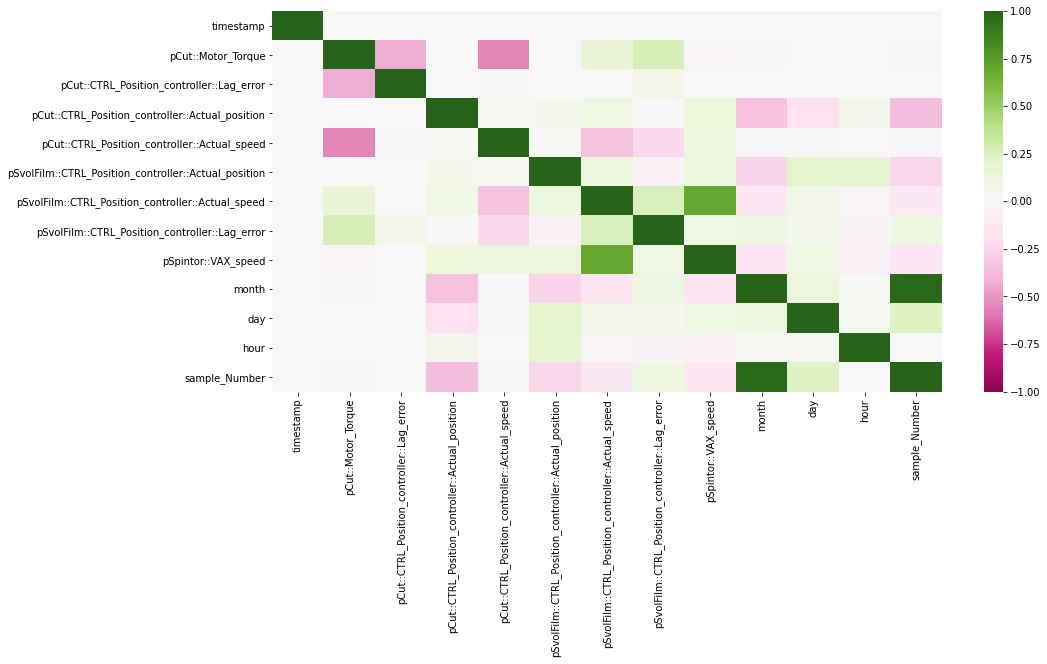

In [11]:
#heatmap of correlations from -1 to 1
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), vmin= -1, vmax = 1, cmap="PiYG")

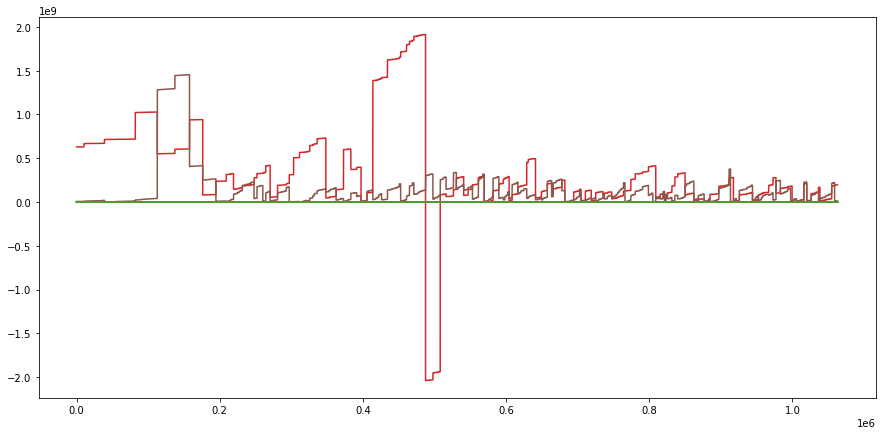

In [12]:
df.plot(figsize=(15,7),legend=False)

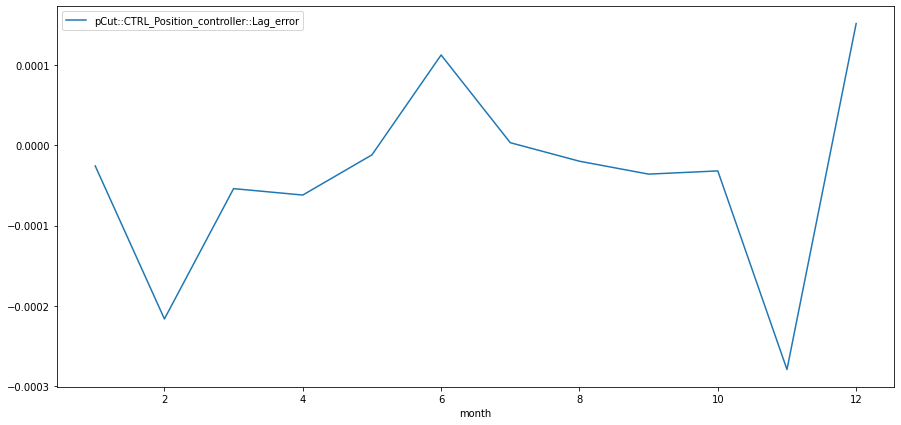

In [13]:
grp=df.groupby('month',as_index=False)['pCut::CTRL_Position_controller::Lag_error'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='month',y='pCut::CTRL_Position_controller::Lag_error',ax=ax)
fig.show()

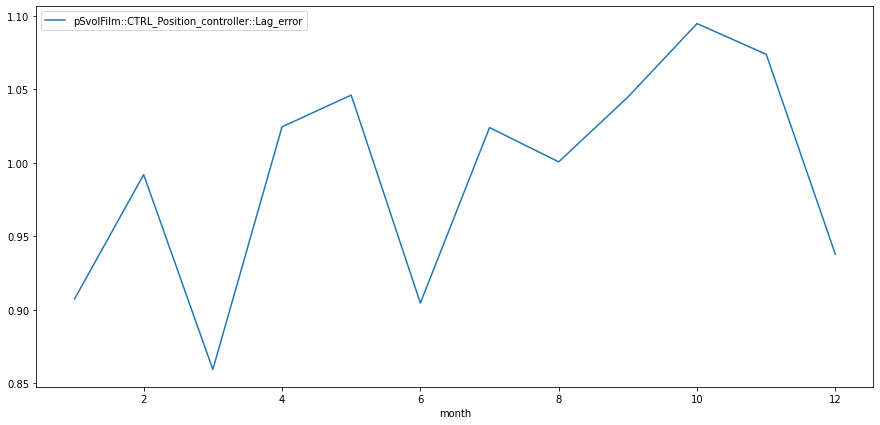

In [14]:

grp=df.groupby('month',as_index=False)['pSvolFilm::CTRL_Position_controller::Lag_error'].mean()
fig, ax =plt.subplots(figsize=(15,7))
grp.plot(x='month',y='pSvolFilm::CTRL_Position_controller::Lag_error',ax=ax)
fig.show()

In [15]:
df1 = df.copy()
df1['time'] = df1['day'].astype(str) + "/" + df1['month'].astype(str)
df1['time'] = pd.to_datetime(df1['time'],format='%d/%m',errors='coerce')
df1['time'] = df1['time'].dt.strftime('%m/%d')
df1.head()

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,month,day,hour,sample_Number,mode,time
0,0.008,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,4,184148.0,0.0,mode1,01/04
1,0.012,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,4,184148.0,0.0,mode1,01/04
2,0.016,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,4,184148.0,0.0,mode1,01/04
3,0.020,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,4,184148.0,0.0,mode1,01/04
4,0.024,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,4,184148.0,0.0,mode1,01/04


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062912 entries, 0 to 1062911
Data columns (total 15 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   timestamp                                             1062912 non-null  float64
 1   pCut::Motor_Torque                                    1062912 non-null  float64
 2   pCut::CTRL_Position_controller::Lag_error             1062912 non-null  float64
 3   pCut::CTRL_Position_controller::Actual_position       1062912 non-null  int64  
 4   pCut::CTRL_Position_controller::Actual_speed          1062912 non-null  float64
 5   pSvolFilm::CTRL_Position_controller::Actual_position  1062912 non-null  int64  
 6   pSvolFilm::CTRL_Position_controller::Actual_speed     1062912 non-null  float64
 7   pSvolFilm::CTRL_Position_controller::Lag_error        1062912 non-null  float64
 8   pSpintor::VAX_speed             

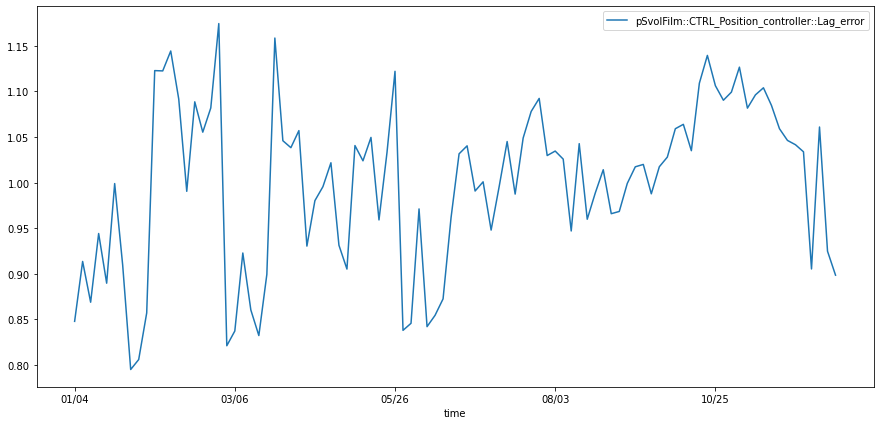

In [17]:
fig, ax =plt.subplots(figsize=(15,7))
grp=df1.groupby('time',as_index=False)['pSvolFilm::CTRL_Position_controller::Lag_error'].mean()
grp.plot(x='time',y='pSvolFilm::CTRL_Position_controller::Lag_error',ax=ax)
fig.show()

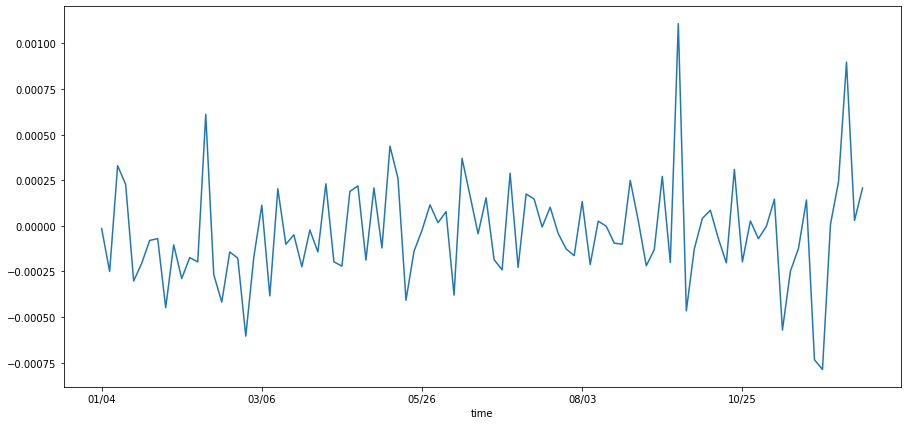

In [18]:
fig, ax =plt.subplots(figsize=(15,7))
grp=df1.groupby('time')['pCut::CTRL_Position_controller::Lag_error'].mean()
grp.plot(x='time',y='pCut::CTRL_Position_controller::Lag_error',ax=ax)
fig.show()

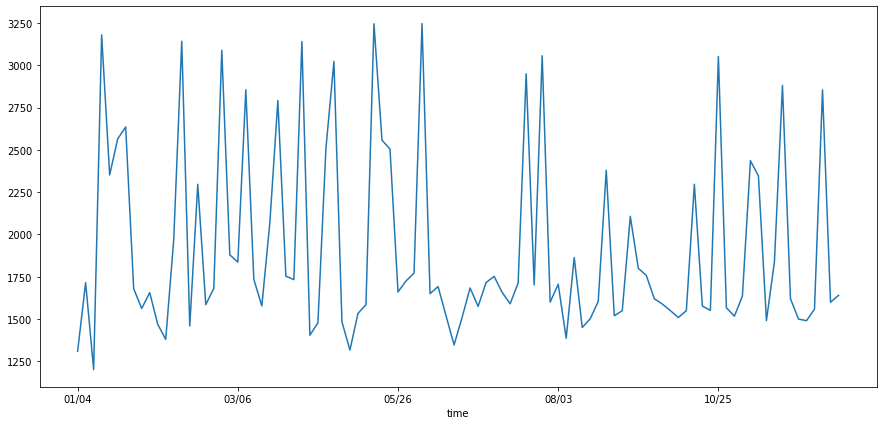

In [19]:
fig, ax =plt.subplots(figsize=(15,7))
grp=df1.groupby('time')['pSpintor::VAX_speed'].mean()
grp.plot(x='time',y='pSpintor::VAX_speed',ax=ax)
fig.show()


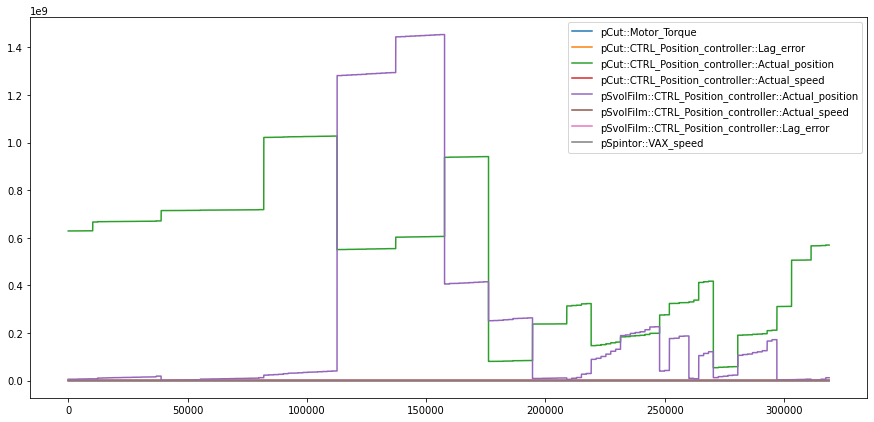

In [20]:
# seperate the healthy data
df1 = df.drop(['day', 'hour', 'sample_Number', 'month', 'timestamp', 'mode'], axis=1)
train_percentage = 0.30
train_size = int(len(df1.index)*train_percentage)
x_train = df1[:train_size]
x_test = df1[train_size:490000]
x_train.plot(figsize=(15,7))

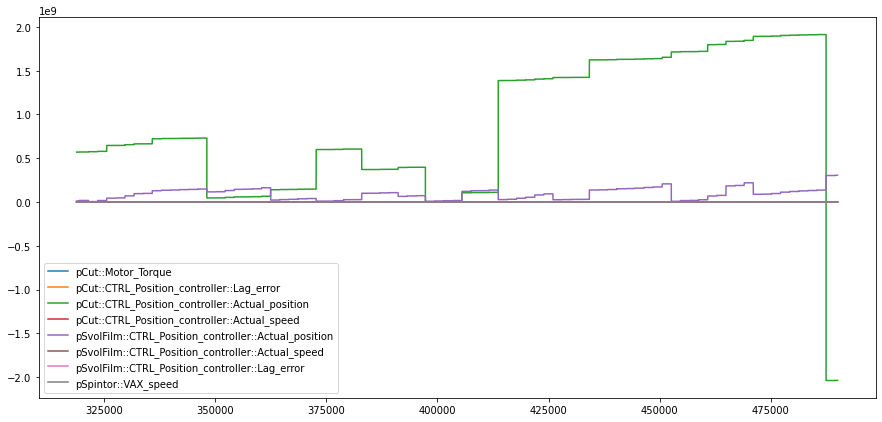

In [21]:
x_test.plot(figsize=(15,7))

In [22]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(x_train), 
                              columns=x_train.columns, 
                              index=x_train.index)


X_test = pd.DataFrame(scaler.transform(x_test), 
                             columns=x_test.columns, 
                             index=x_test.index)


AutoEncoder

In [23]:
np.random.seed(10)
tf.random.set_seed(10)

act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
              )
        )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2, input_shape=(60,)))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=200

history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1)

Epoch 1/100
1435/1435 [==============================] - 3s 2ms/step - loss: 0.0594 - val_loss: 0.0171
Epoch 2/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0206 - val_loss: 0.0169
Epoch 3/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0187 - val_loss: 0.0168
Epoch 4/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0185 - val_loss: 0.0167
Epoch 5/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0185 - val_loss: 0.0168
Epoch 6/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0185 - val_loss: 0.0166
Epoch 7/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0185 - val_loss: 0.0168
Epoch 8/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0184 - val_loss: 0.0158
Epoch 9/100
1435/1435 [==============================] - 2s 1ms/step - loss: 0.0176 - val_loss: 0.0139
Epoch 10/100
1435/1435 [==============================] - 2s 1ms/step - l

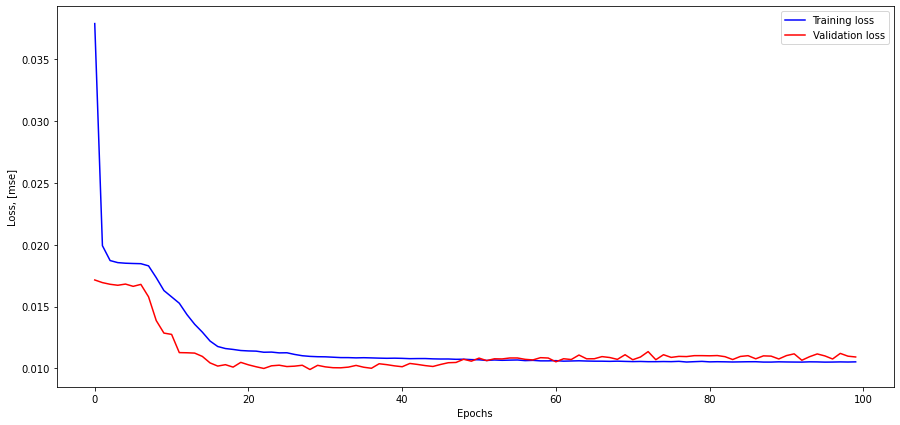

In [24]:
plt.subplots(figsize=(15,7))

plt.plot(history.history['loss'],'b',label='Training loss')
plt.plot(history.history['val_loss'],'r',label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

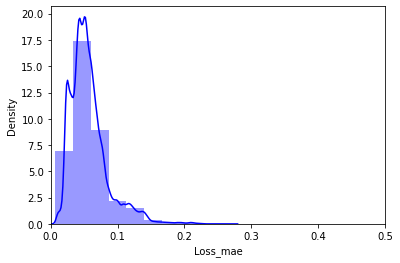

In [25]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [26]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = np.max(scored_train['Loss_mae'])
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']


In [27]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = np.max(scored_train['Loss_mae'])
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored = pd.concat([scored_train, scored])
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.036751,0.272583,False
1,0.036789,0.272583,False
2,0.038828,0.272583,False
3,0.042232,0.272583,False
4,0.043033,0.272583,False


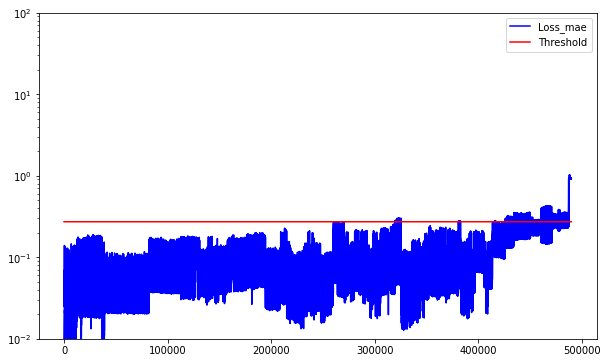

In [28]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

PCA + Mahalanobis distance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 15.0)

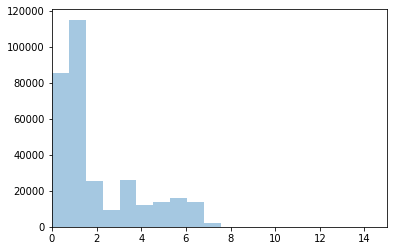

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index
def cov_matrix(data, verbose=False):

  covariance_matrix = np.cov(data, rowvar=False)
  if is_pos_def(covariance_matrix):
      inv_covariance_matrix = np.linalg.inv(covariance_matrix)
      if is_pos_def(inv_covariance_matrix):
          return covariance_matrix, inv_covariance_matrix
      else:
          print("Error: Inverse of Covariance Matrix is not positive definite!")
  else:
      print("Error: Covariance Matrix is not positive definite!")
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
  
  inv_covariance_matrix = inv_cov_matrix
  vars_mean = mean_distr
  diff = data - vars_mean
  md = []
  for i in range(len(diff)):
      md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
  return md

def MD_threshold(dist, extreme=False, verbose=False):
    
  k = 3. if extreme else 2.
  threshold = np.mean(dist) * k
  return threshold

def is_pos_def(A):

  if np.allclose(A, A.T):
      try:
          np.linalg.cholesky(A)
          return True
      except np.linalg.LinAlgError:
          return False
  else:
      return False
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train)

plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

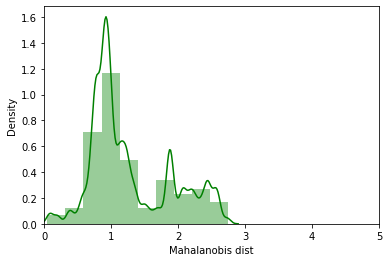

In [30]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [31]:

anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

anomaly_alldata = pd.concat([anomaly_train, anomaly])

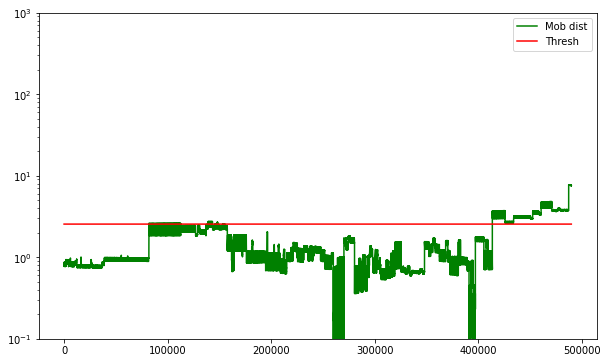

In [32]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])